In [1]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

In [36]:
def games(N, M, player):
    indeces = np.arange(N, dtype=int)
    car = np.random.choice(N, 1)
    choice = np.random.choice(N, 1)
    remaining_indeces = np.delete(indeces, [car, choice])
    #avalaible_indeces = indeces[indeces!=remaining_indeces[:M]]
    avalaible_indeces = np.delete(indeces, remaining_indeces[:M])
    if player == 1:
        choice = np.random.choice(avalaible_indeces[avalaible_indeces!=choice])
    if player == 2:
        choice = np.random.choice(avalaible_indeces)
    if choice == car:
        return 1
    else:
        return 0

In [38]:
N = 100
M = 98
N_games = 100000
results =  np.zeros((3, N_games))
for j in range(3):     #0 = conservative; 1 = switcher; 2 = newcommer
    for i in tqdm(range(N_games)):
        results[j][i] = games(N, M, j)
wins = [len(results[0][results[0]==1])/N_games, len(results[1][results[1]==1])/N_games, len(results[2][results[2]==1])/N_games]

100%|██████████| 100000/100000 [00:12<00:00, 7803.23it/s]


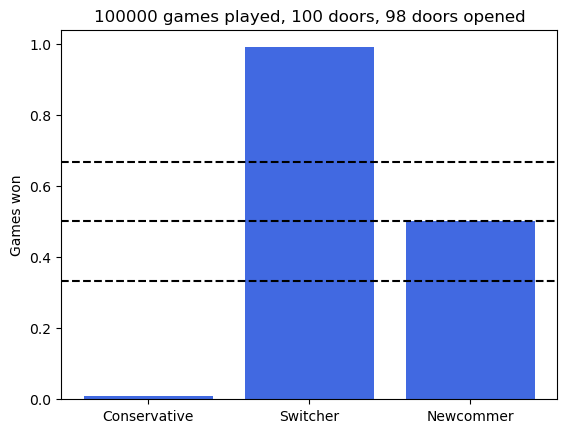

In [39]:
players = ['Conservative', 'Switcher', 'Newcommer']
plt.bar(players, wins, color = 'royalblue')
plt.title('%i games played, %i doors, %i doors opened' %(N_games, N, M))
for y in [1/3,1/2,2/3]:
    plt.axhline(y, ls='--', c='black')
plt.ylabel('Games won')
plt.show()